# IMAGE CLASSIFICATION MODEL

In this lab we built an image classification model using a deep neural network trained on labeled image data.

In the following sections, we'll:
- preprocess image dataset
- training a multilayer CNN using PyTorch
- perform model evaluation using accuracy, loss curves and confusion matrices.

## Understanding And Preprocessing data

In [13]:
# Importing the required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [14]:
# Define data transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [15]:
# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

## Model Building And Training

In [16]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
model = CNN()

In [18]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
# Training loop
train_losses = []  # Initialize a list to store training losses

for epoch in range(10):  # 10 epochs
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)  # Append the average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1, Loss: 1.3940
Epoch 2, Loss: 1.0158
Epoch 3, Loss: 0.8676
Epoch 4, Loss: 0.7705
Epoch 5, Loss: 0.6927
Epoch 6, Loss: 0.6240
Epoch 7, Loss: 0.5535
Epoch 8, Loss: 0.5031
Epoch 9, Loss: 0.4459
Epoch 10, Loss: 0.3982


## Model Evaluation

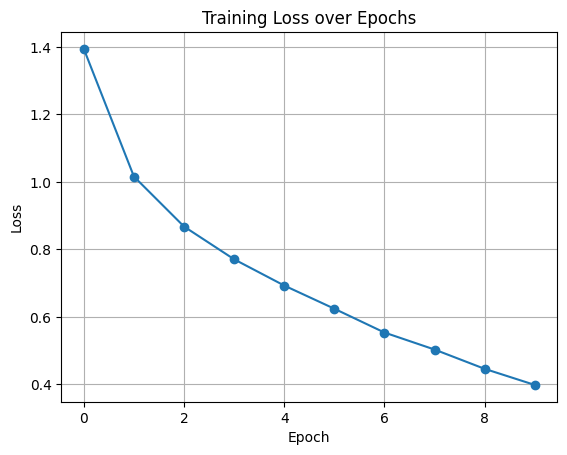

In [20]:
# Plot training loss
import matplotlib.pyplot as plt
plt.plot(train_losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [21]:
# Evaluate model
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

In [25]:
# Accuracy calculation
import numpy as np
accuracy = 100 * np.mean(np.array(y_true) == np.array(y_pred))
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 72.55%


In [27]:
# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=testset.classes))


Classification Report:

              precision    recall  f1-score   support

    airplane       0.72      0.79      0.76      1000
  automobile       0.88      0.78      0.82      1000
        bird       0.68      0.53      0.60      1000
         cat       0.54      0.54      0.54      1000
        deer       0.66      0.74      0.70      1000
         dog       0.67      0.62      0.64      1000
        frog       0.76      0.79      0.78      1000
       horse       0.76      0.76      0.76      1000
        ship       0.80      0.85      0.83      1000
       truck       0.78      0.85      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



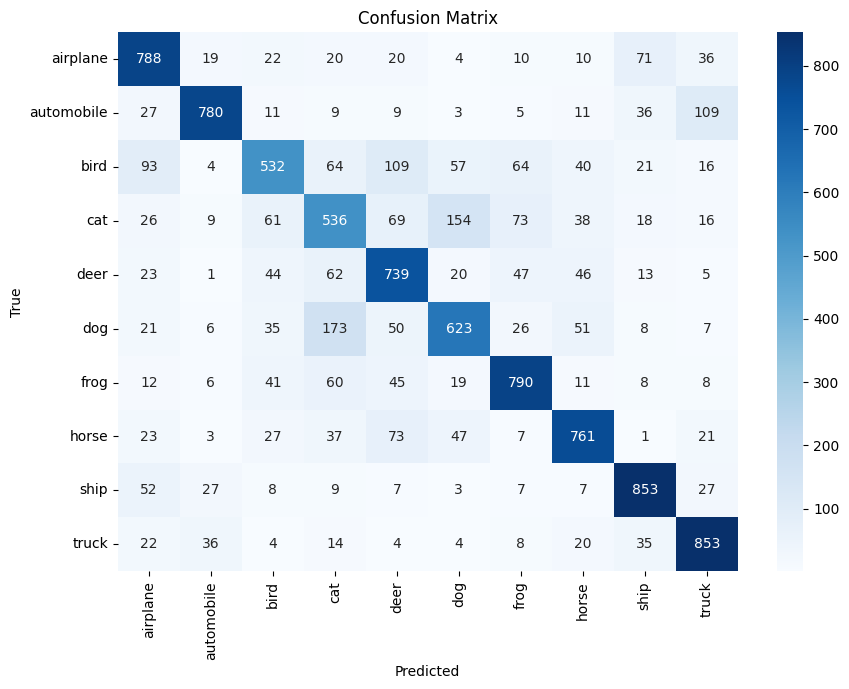

In [29]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns # Import seaborn for heatmap

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=testset.classes, yticklabels=testset.classes, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Sample Predictions

In [30]:
# Sample Predictions
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)


Predicted:   cat | automobile |  ship | airplane |   cat |  frog | automobile |  deer
Actual:      cat |  ship |  ship | airplane |  frog |  frog | automobile |  frog


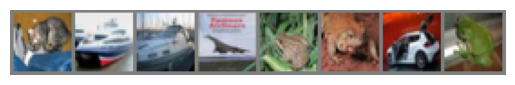

In [31]:
# Show images and predicted labels
imshow(torchvision.utils.make_grid(images[:8]))
print("\nPredicted:", ' | '.join('%5s' % testset.classes[predicted[j]] for j in range(8)))
print("Actual:   ", ' | '.join('%5s' % testset.classes[labels[j]] for j in range(8)))